<h3>Project Week 02</h3>
<p>名企BI班 week1 谢雅楠 20200905</p>

<h4>Thinking</h4>
<p>1.MVC框架指的是什么?<br/> → MVC框架，即Model模型-View视图-Controller控制器框架是一种体系结构模式，它将应用程序分为三个主要的逻辑组件：模型，视图和控制器。每个组件均构建为处理应用程序的特定开发方面。 MVC将业务逻辑层和表示层彼此分离。传统上，它用于桌面图形用户界面，如今MVC体系结构已成为设计Web应用程序和移动应用程序的流行方法。（ref.https://www.guru99.com/mvc-tutorial.html#:~:text=The%20Model%2DView%2DController%20(,development%20aspect%20of%20an%20application.）</p>
<p>2.基于Python的可视化技术都有哪些?你使用过哪些？<br/> → 基于Python的可视化技术包括：matplotlib、seaborn、NLTK词云分析、pydot+GraphViz决策树可视化、Dash、Pyecharts等。<br/> → 使用过matplotlib和seaborn。</p>

<h4>Action 1 购物篮词云分析</h4>

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/xieyanan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

根据词频，开始生成词云!


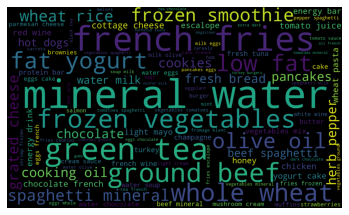

In [1]:
# -*- coding:utf-8 -*-
# 词云展示
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from lxml import etree
from nltk.tokenize import word_tokenize

# 去掉停用词
def remove_stop_words(f):
	stop_words = []
	for stop_word in stop_words:
		f = f.replace(stop_word, '')
	return f

# 生成词云
def create_word_cloud(f):
	print('根据词频，开始生成词云!')
	f = remove_stop_words(f)
	cut_text = word_tokenize(f)
	#print(cut_text)
	cut_text = " ".join(cut_text)
	wc = WordCloud(
		max_words=100,
		width=2000,
		height=1200,
    )
	wordcloud = wc.generate(cut_text)
	# 写词云图片
	wordcloud.to_file("wordcloud.jpg")
	# 显示词云文件
	plt.imshow(wordcloud)
	plt.axis("off")
	plt.show()

# 数据加载
data = pd.read_csv("Market_Basket_Optimisation.csv", header=None)
# 将数据存放到transaction中
transactions = []
# 存储key：value
item_count = {}
for i in range(0, data.shape[0]):
    temp = []
    for j in range(0,20):
        item = str(data.values[i,j])
        if item != 'nan':
            temp.append(item)
            if item not in item_count:
                item_count[item] = 1
            else:
                item_count[item] += 1
    transactions.append(temp)
# 生成词云
all_word = ' '.join('%s' %item for item in transactions)
create_word_cloud(all_word)


<h4>Action 2 输出top10的商品</h4>

In [2]:
sorted = sorted(item_count.items(), key=lambda x:x[1], reverse=True)
for i in range(10):
    print(sorted[i][0])

mineral water
eggs
spaghetti
french fries
chocolate
green tea
milk
ground beef
frozen vegetables
pancakes
